<a href="https://colab.research.google.com/github/MariamAbdo217/Data-Analysis-Report/blob/main/My_DS_II_Project_File_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          country     1801     1802     1803     1804     1805     1806  \
0           Aruba        0        0        0        0        0        0   
1     Afghanistan        0        0        0        0        0        0   
2          Angola    0.425    0.425    0.425    0.425    0.425    0.425   
3        Anguilla        0        0        0        0        0        0   
4         Albania    0.418    0.418    0.418    0.418    0.418    0.418   
..            ...      ...      ...      ...      ...      ...      ...   
216         Samoa  −0.0169  −0.0169  −0.0169  −0.0169  −0.0169  −0.0169   
217         Yemen   0.0236   0.0236   0.0236   0.0236   0.0236   0.0236   
218  South Africa  −0.0381  −0.0381  −0.0381  −0.0381    −4.89    0.401   
219        Zambia    0.227    0.227    0.227    0.227    0.227    0.227   
220      Zimbabwe    0.106    0.106    0.106    0.106    0.106    0.106   

        1807     1808     1809  ...   2004   2005   2006   2007   2008   2009  \
0          0      

country
Afghanistan         Axes(0.125,0.11;0.775x0.77)
Albania             Axes(0.125,0.11;0.775x0.77)
Algeria             Axes(0.125,0.11;0.775x0.77)
American Samoa      Axes(0.125,0.11;0.775x0.77)
Andorra             Axes(0.125,0.11;0.775x0.77)
                               ...             
Vietnam             Axes(0.125,0.11;0.775x0.77)
Wallis et Futuna    Axes(0.125,0.11;0.775x0.77)
Yemen               Axes(0.125,0.11;0.775x0.77)
Zambia              Axes(0.125,0.11;0.775x0.77)
Zimbabwe            Axes(0.125,0.11;0.775x0.77)
Length: 221, dtype: object

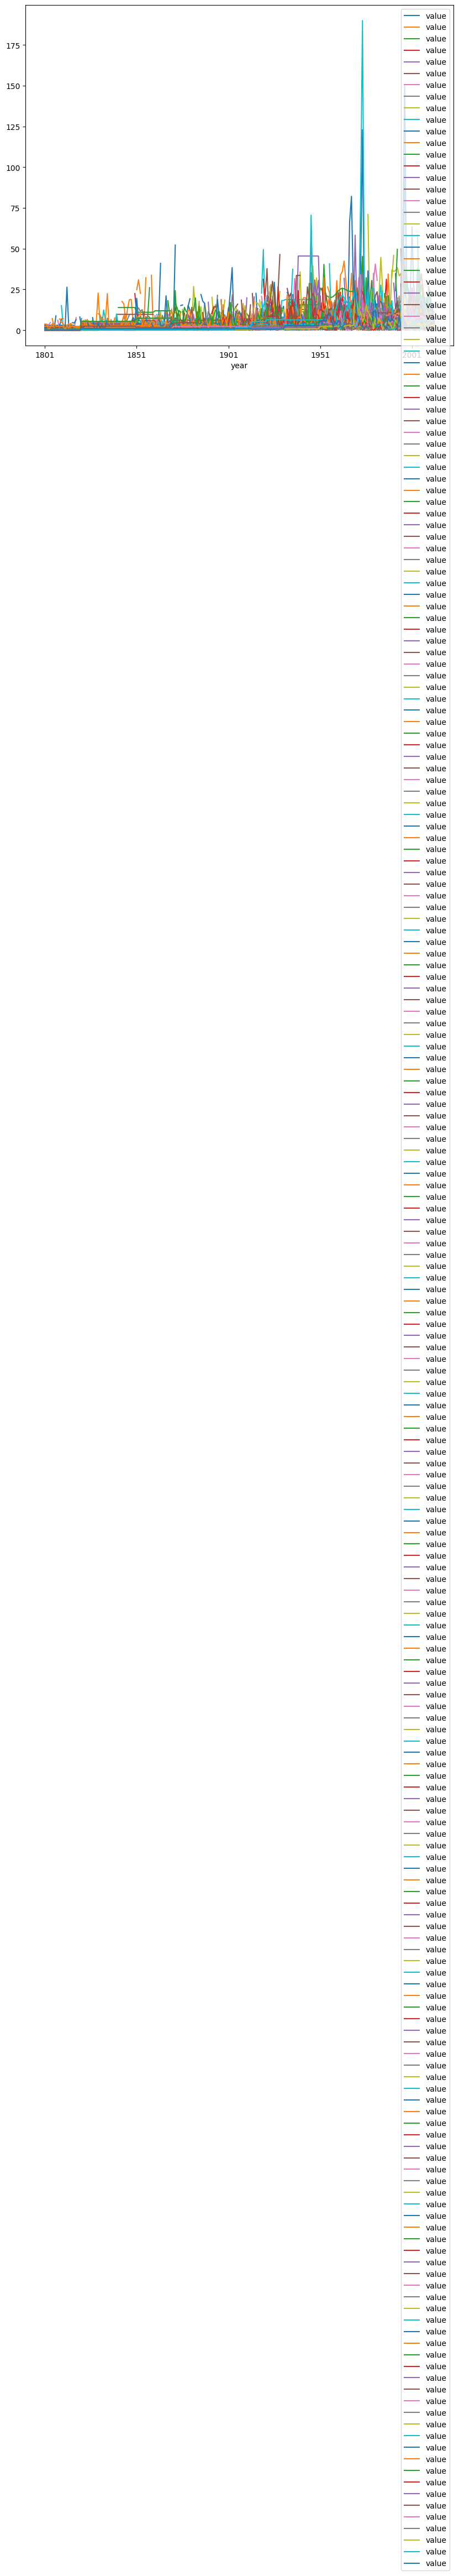

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("/content/gdp_total_yearly_growth.xlsx")
print(df)
countries = df["country"]
years = df.columns.drop("country")
print(years)
df_1 = pd.melt(df,id_vars=["country"], var_name = "year")
df_1.head()
df_1.tail()
df_12 = df_1.set_index("year")
df_12.head()
df_12.tail()
print(df_12.dtypes)
df_12['value'] = pd.to_numeric(df_12['value'], errors='coerce')
print(df_12.dtypes)
fig, ax = plt.subplots(figsize=(10,8))
df_12.groupby("country").plot(ax = ax)


          country     1801     1802     1803     1804     1805     1806  \
0           Aruba        0        0        0        0        0        0   
1     Afghanistan        0        0        0        0        0        0   
2          Angola    0.425    0.425    0.425    0.425    0.425    0.425   
3        Anguilla        0        0        0        0        0        0   
4         Albania    0.418    0.418    0.418    0.418    0.418    0.418   
..            ...      ...      ...      ...      ...      ...      ...   
216         Samoa  −0.0169  −0.0169  −0.0169  −0.0169  −0.0169  −0.0169   
217         Yemen   0.0236   0.0236   0.0236   0.0236   0.0236   0.0236   
218  South Africa  −0.0381  −0.0381  −0.0381  −0.0381    −4.89    0.401   
219        Zambia    0.227    0.227    0.227    0.227    0.227    0.227   
220      Zimbabwe    0.106    0.106    0.106    0.106    0.106    0.106   

        1807     1808     1809  ...   2004   2005   2006   2007   2008   2009  \
0          0      

<ipython-input-36-29ef783ba45d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['year'] = df_subset['year'].astype(int)


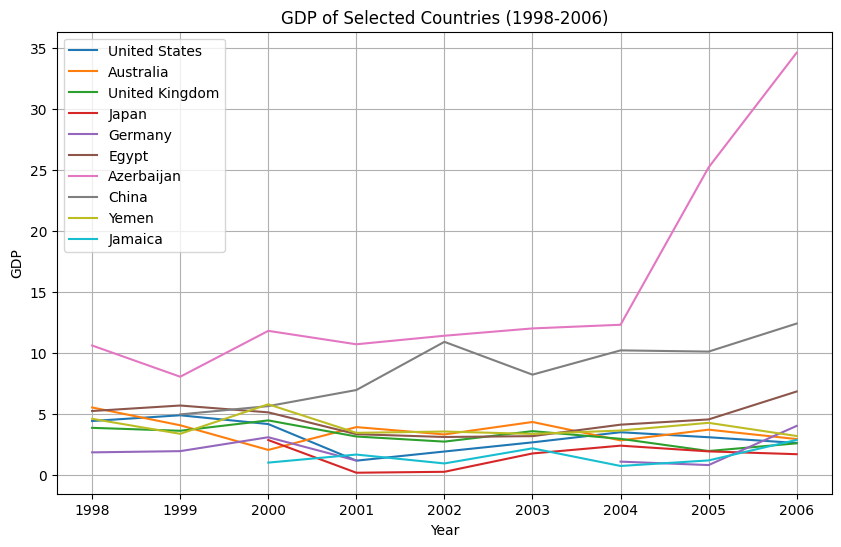

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("/content/gdp_total_yearly_growth.xlsx")
print(df)
countries = df["country"]
years = df.columns.drop("country")
print(years)
df_1 = pd.melt(df,id_vars=["country"], var_name = "year")
df_1.head()
df_1.tail()
df_12 = df_1.set_index("year")
df_12.head()
df_12.tail()
print(df_12.dtypes)
df_12['value'] = pd.to_numeric(df_12['value'], errors='coerce')
df_12.index = df_12.index.astype(int)
df_subset = df_12[(df_12.index >= 1998) & (df_12.index <= 2006)]
df_subset.reset_index(inplace=True)
df_subset['year'] = df_subset['year'].astype(int)
print(df_subset)
countries_of_interest = ['United States', 'Australia', 'United Kingdom', 'Japan', 'Germany', 'Egypt', 'Azerbaijan', 'China', 'Yemen', 'Jamaica']
df_countries_subset = df_subset[df_subset['country'].isin(countries_of_interest)]
print(df_countries_subset.head())
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_countries_subset[df_countries_subset['country'] == country]
    plt.plot(country_data['year'], country_data['value'], label=country)
plt.title('GDP of Selected Countries (1998-2006)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
import pandas as pd
import random
# List of filenames
filenames = [
    'broadband.xlsx',
    'cellphones.xlsx',
    'computers.xlsx',
    'gdp.xlsx',
    'internetusers.xlsx',
    'percapita.xlsx',
    'population.xlsx'
]
dfs = []

for filename in filenames:
    dfs.append(pd.read_excel(filename))

common = set(dfs[0]['country']) #the first DataFrame
for df in dfs[1:]:
    common = common.intersection(df['country'])

# Print common countries
print("Common countries:", list(common))
num_common_countries = len(common)
print(num_common_countries)

Common countries: ['Paraguay', 'Guinea', 'Palestine', 'Pakistan', 'Madagascar', 'Tunisia', 'Albania', 'Papua New Guinea', 'Peru', 'Cyprus', 'St. Kitts and Nevis', 'Fiji', 'Brazil', 'Tajikistan', 'Monaco', 'Marshall Islands', 'Lithuania', 'Azerbaijan', 'Luxembourg', 'Slovenia', 'Uzbekistan', 'France', 'Belarus', 'Qatar', 'Armenia', 'Congo, Rep.', 'Bangladesh', 'Iceland', 'Trinidad and Tobago', 'Benin', 'Angola', 'Nigeria', 'Sao Tome and Principe', 'Lebanon', 'El Salvador', 'North Macedonia', 'St. Vincent and the Grenadines', 'Zambia', 'Ethiopia', 'Ghana', 'Kuwait', 'Hungary', 'Georgia', 'Guyana', 'Croatia', 'Malta', 'Mauritania', 'Solomon Islands', 'Tonga', 'Jordan', 'Sweden', 'Uganda', 'Costa Rica', 'Guinea-Bissau', 'Suriname', 'Dominican Republic', 'Venezuela', 'Morocco', 'Grenada', 'Malaysia', 'Eritrea', 'Mali', 'Spain', 'Seychelles', 'Czech Republic', 'Norway', 'Central African Republic', 'Portugal', 'Poland', 'Tuvalu', 'Saudi Arabia', 'Chad', 'Equatorial Guinea', 'Namibia', 'San Ma

In [ ]:
Africa = ["Angola", "Benin", "Burkina Faso", "Burundi", "Cameroon", "Central African Republic","Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", "Eritrea", "Ethiopia","Gambia", "Guinea", "Guinea-Bissau", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali","Mauritania", "Mozambique", "Niger", "Rwanda", "Sao Tome and Principe", "Senegal","Sierra Leone", "Somalia", "South Sudan", "Sudan", "Tanzania", "Togo", "Uganda", "Zambia" ]
Europe = ["Andorra", "Austria", "Belgium", "Channel Islands", "Croatia", "Czech Republic","Denmark", "Estonia", "Faroe Islands", "Finland", "France", "Germany", "Gibraltar","Greece", "Hungary", "Iceland", "Ireland", "Isle of Man", "Italy", "Latvia","Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Monaco", "Netherlands","Norway", "Poland", "Portugal", "San Marino", "Slovakia", "Slovenia", "Spain","Sweden", "Switzerland", "Turkey", "United Kingdom" ]

In [ ]:
commonUnderDeveloped = set(common).intersection(Africa)
print(len(commonUnderDeveloped))
print(commonUnderDeveloped)

30
{'Somalia', 'Guinea', 'Tanzania', 'Madagascar', 'Eritrea', 'Comoros', 'Mali', 'Niger', 'Central African Republic', 'Malawi', 'Chad', 'Burundi', 'Senegal', 'Benin', 'Angola', 'Sao Tome and Principe', 'Cameroon', 'Mozambique', 'Rwanda', 'Zambia', 'Ethiopia', 'Lesotho', 'Mauritania', 'Gambia', 'Uganda', 'Sudan', 'Djibouti', 'Togo', 'Burkina Faso', 'Guinea-Bissau'}


In [ ]:
randomAFR= random.sample(list(commonUnderDeveloped), 5)
print("Randomly chosen African Underdeveloped countries:")
for country in randomAFR:
    print(country)

Randomly chosen African Underdeveloped countries:
Benin
Mali
Sao Tome and Principe
Cameroon
Madagascar


In [ ]:
commonDeveloped = set(common).intersection(Europe)
print(len(commonDeveloped))
print(commonDeveloped)

30
{'Latvia', 'Finland', 'Germany', 'Austria', 'Switzerland', 'Estonia', 'Spain', 'Czech Republic', 'Monaco', 'Lithuania', 'Norway', 'Portugal', 'United Kingdom', 'Poland', 'Luxembourg', 'Slovenia', 'France', 'San Marino', 'Iceland', 'Italy', 'Greece', 'Hungary', 'Croatia', 'Malta', 'Sweden', 'Netherlands', 'Denmark', 'Belgium', 'Turkey', 'Ireland'}


In [ ]:
randomEUR= random.sample(list(commonDeveloped), 5)
print("Randomly chosen European Developed countries:")
for country in randomEUR:
    print(country)

Randomly chosen European Developed countries:
Czech Republic
Ireland
Greece
Netherlands
Norway


In [ ]:
print(randomAFR)
print(randomEUR)

['Benin', 'Mali', 'Sao Tome and Principe', 'Cameroon', 'Madagascar']
['Czech Republic', 'Ireland', 'Greece', 'Netherlands', 'Norway']


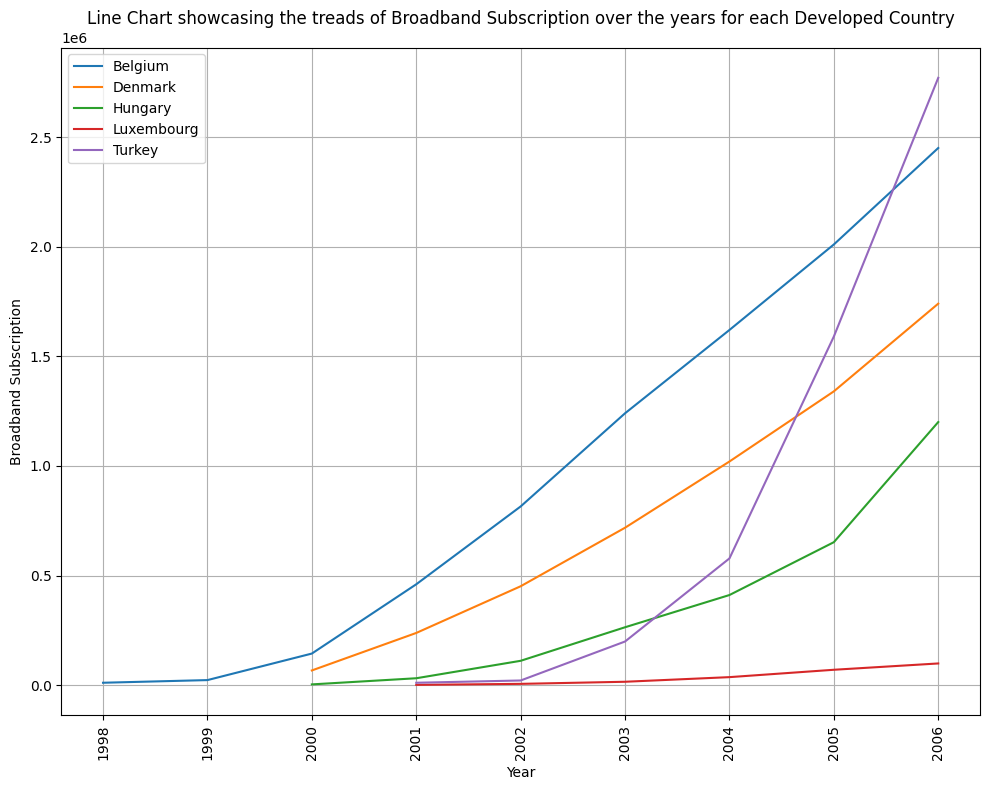

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_broadbandEUR = pd.read_excel("/content/EURbroadband.xlsx")
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_broadbandEUR.columns.drop('country'):

  df_broadbandEUR[column]=df_broadbandEUR[column].apply(convert_to_numeric)


df_broadbandEURIndex = df_broadbandEUR.set_index('country').T

plt.figure(figsize=(10, 8))
for country in df_broadbandEURIndex.columns:
    plt.plot(df_broadbandEURIndex.index, df_broadbandEURIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Broadband Subscription')
plt.title('Line Chart showcasing the treads of Broadband Subscription over the years for each Developed Country')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()


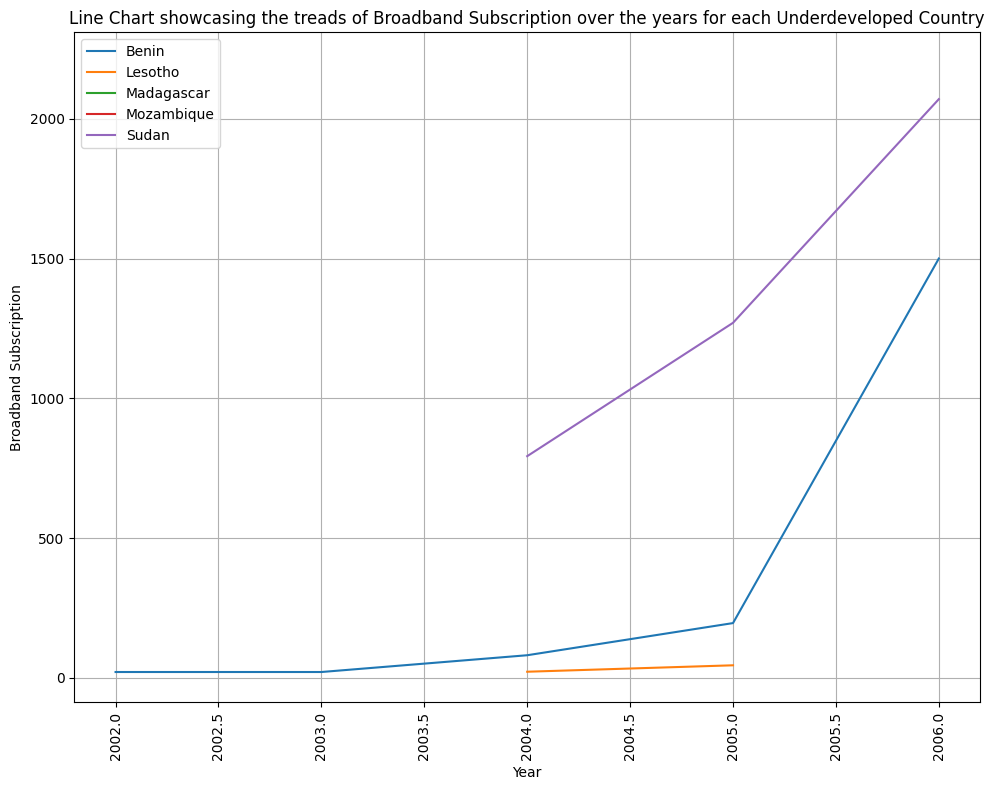

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_broadbandAFR = pd.read_excel("/content/AFRbroadband.xlsx")

def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_broadbandAFR.columns.drop('country'):

  df_broadbandAFR[column]=df_broadbandAFR[column].apply(convert_to_numeric)




df_broadbandAFRIndex = df_broadbandAFR.set_index('country').T

plt.figure(figsize=(10, 8))
for country in df_broadbandAFRIndex.columns:
    plt.plot(df_broadbandAFRIndex.index, df_broadbandAFRIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Broadband Subscription')
plt.title('Line Chart showcasing the treads of Broadband Subscription over the years for each Underdeveloped Country')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

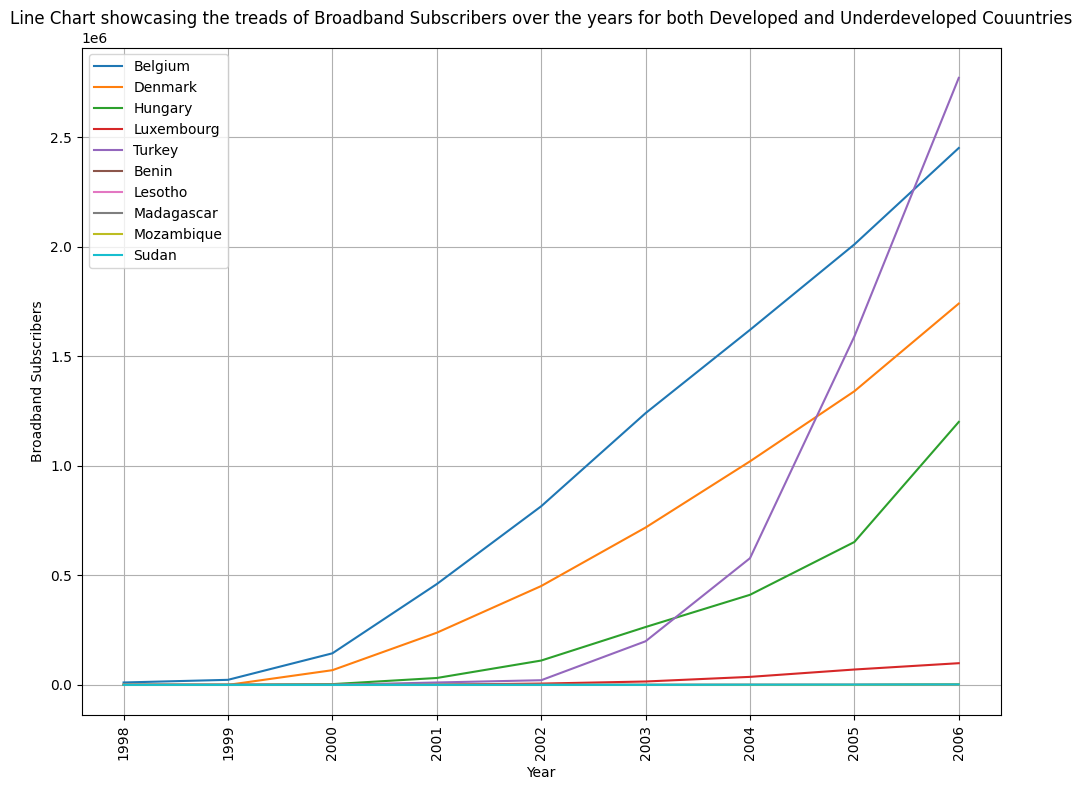

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_broadbandAFR = pd.read_excel("/content/AFRbroadband.xlsx")
df_broadbandEUR = pd.read_excel("/content/EURbroadband.xlsx")

mergedEURAFR = pd.concat([df_broadbandEUR,df_broadbandAFR])

def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in mergedEURAFR.columns.drop('country'):

  mergedEURAFR[column]=mergedEURAFR[column].apply(convert_to_numeric)

mergedEURAFR.fillna(0,inplace = True)



mergedEURAFRIndex = mergedEURAFR.set_index('country').T


plt.figure(figsize=(10,8))
for country in mergedEURAFRIndex.columns:
    plt.plot(mergedEURAFRIndex.index, mergedEURAFRIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Broadband Subscribers')
plt.title('Line Chart showcasing the treads of Broadband Subscribers over the years for both Developed and Underdeveloped Couuntries')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

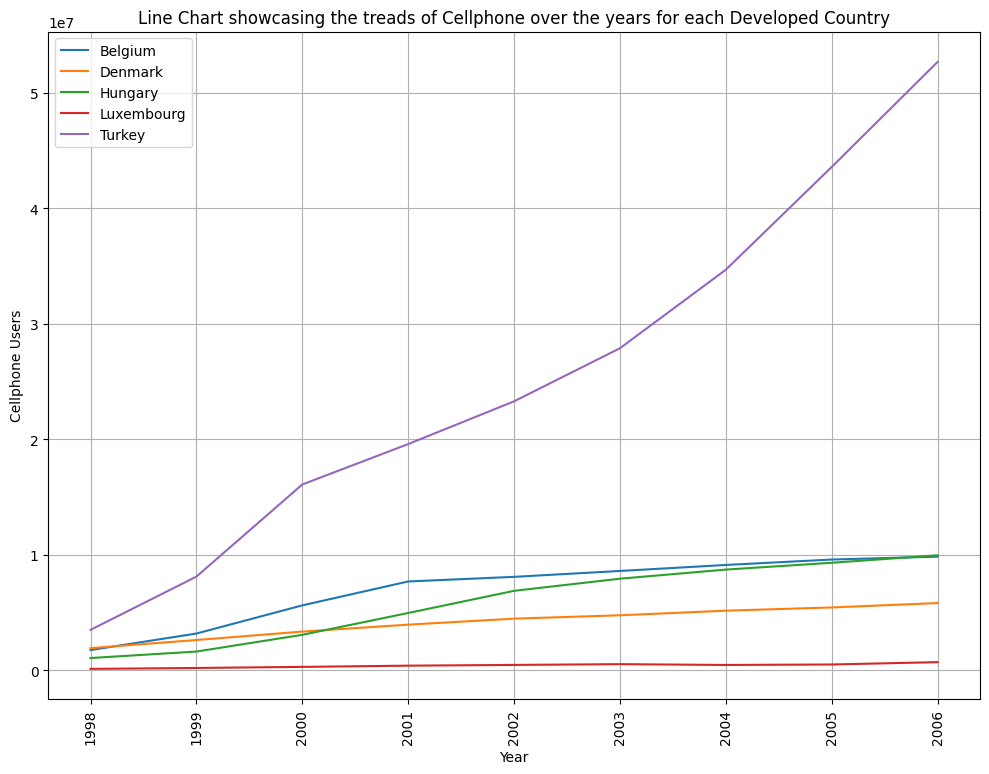

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cellphoneEUR = pd.read_excel("/content/EURcellphones.xlsx")

def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_cellphoneEUR.columns.drop('country'):

  df_cellphoneEUR[column]=df_cellphoneEUR[column].apply(convert_to_numeric)




df_cellphoneEURIndex = df_cellphoneEUR.set_index('country').T

plt.figure(figsize=(10, 8))
for country in df_cellphoneEURIndex.columns:
    plt.plot(df_cellphoneEURIndex.index, df_cellphoneEURIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Cellphone Users')
plt.title('Line Chart showcasing the treads of Cellphone over the years for each Developed Country')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()


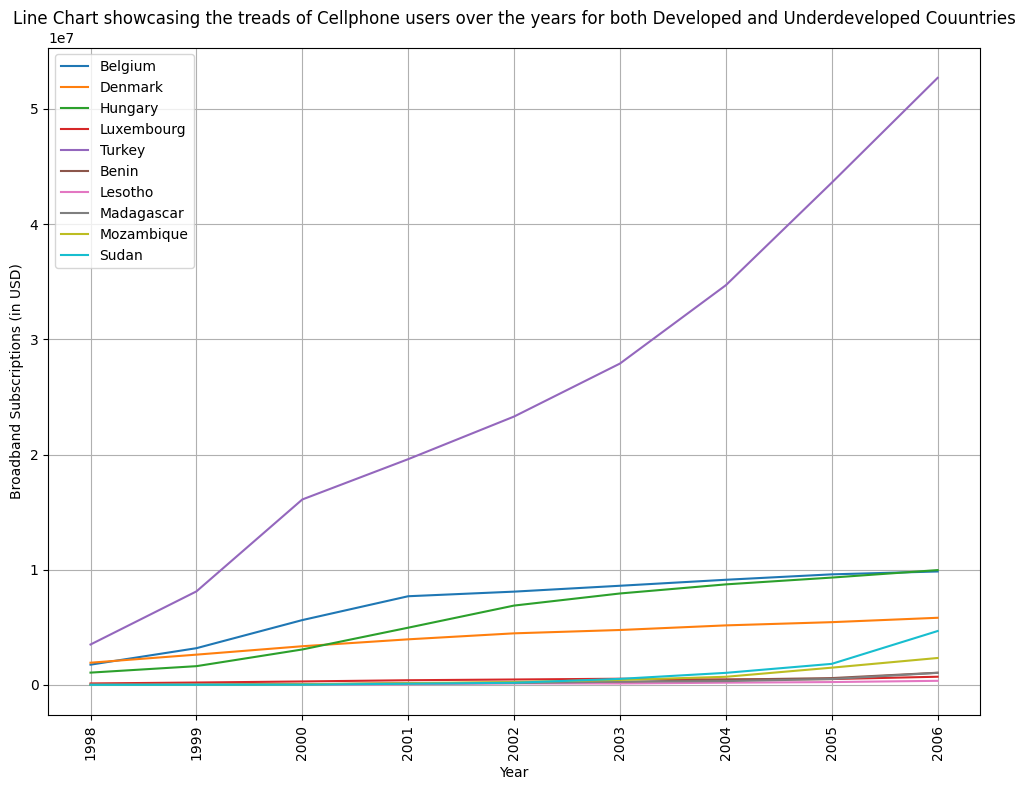

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cellphoneAFR = pd.read_excel("/content/AFRcellphones.xlsx")
df_cellphoneEUR = pd.read_excel("/content/EURcellphones.xlsx")

mergedCEURAFR = pd.concat([df_cellphoneEUR,df_cellphoneAFR])

def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in mergedCEURAFR.columns.drop('country'):

  mergedCEURAFR[column]=mergedCEURAFR[column].apply(convert_to_numeric)

mergedCEURAFR.fillna(0,inplace = True)



mergedCEURAFRIndex = mergedCEURAFR.set_index('country').T


plt.figure(figsize=(10,8))
for country in mergedCEURAFRIndex.columns:
    plt.plot(mergedCEURAFRIndex.index, mergedCEURAFRIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Cellphone Users')
plt.title('Line Chart showcasing the treads of Cellphone users over the years for both Developed and Underdeveloped Couuntries')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

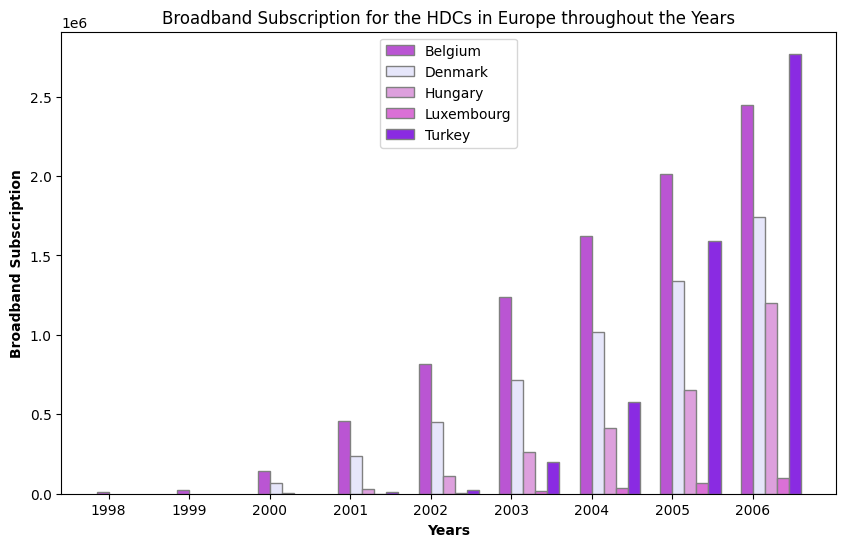

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_broadbandEUR = pd.read_excel("/content/EURbroadband.xlsx")
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_broadbandEUR.columns.drop('country'):
  df_broadbandEUR[column]=df_broadbandEUR[column].apply(convert_to_numeric)



df_broadbandEUR.set_index('country', inplace=True)


Years =list(range(1998,2007))
Belgium = list(df_broadbandEUR.iloc[0])
Denmark = list(df_broadbandEUR.iloc[1])
Hungary= list(df_broadbandEUR.iloc[2])
Luxembourg = list(df_broadbandEUR.iloc[3])
Turkey= list(df_broadbandEUR.iloc[4])
bar_width = 0.15
r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Belgium, color='mediumorchid', width=bar_width, edgecolor='grey', label='Belgium')
plt.bar(r2, Denmark, color='lavender', width=bar_width, edgecolor='grey', label='Denmark')
plt.bar(r3, Hungary, color='plum', width=bar_width, edgecolor='grey', label='Hungary')
plt.bar(r4, Luxembourg, color='orchid', width=bar_width, edgecolor='grey', label='Luxembourg')
plt.bar(r5, Turkey, color='blueviolet', width=bar_width, edgecolor='grey', label='Turkey')


# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Broadband Subscription', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Broadband Subscription for the HDCs in Europe throughout the Years')
plt.legend()



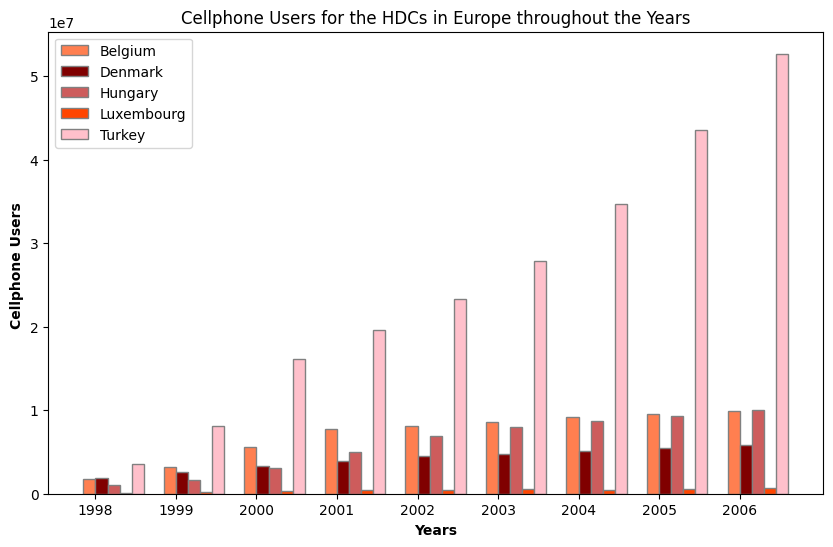

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cellphoneEUR = pd.read_excel("/content/EURcellphones.xlsx")
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_cellphoneEUR.columns.drop('country'):
  df_cellphoneEUR[column]=df_cellphoneEUR[column].apply(convert_to_numeric)




df_cellphoneEUR.set_index('country', inplace=True)


Years =list(range(1998,2007))
Belgium = list(df_cellphoneEUR.iloc[0])
Denmark = list(df_cellphoneEUR.iloc[1])
Hungary= list(df_cellphoneEUR.iloc[2])
Luxembourg = list(df_cellphoneEUR.iloc[3])
Turkey= list(df_cellphoneEUR.iloc[4])
bar_width = 0.15
r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Belgium, color='coral', width=bar_width, edgecolor='grey', label='Belgium')
plt.bar(r2, Denmark, color='maroon', width=bar_width, edgecolor='grey', label='Denmark')
plt.bar(r3, Hungary, color='indianred', width=bar_width, edgecolor='grey', label='Hungary')
plt.bar(r4, Luxembourg, color='orangered', width=bar_width, edgecolor='grey', label='Luxembourg')
plt.bar(r5, Turkey, color='pink', width=bar_width, edgecolor='grey', label='Turkey')


# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Cellphone Users ', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Cellphone Users for the HDCs in Europe throughout the Years')
plt.legend()


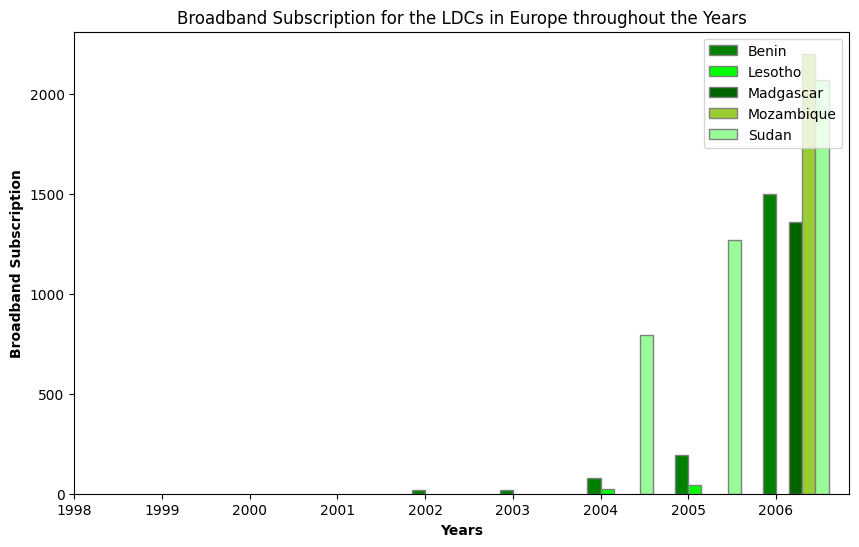

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_broadbandAFR = pd.read_excel("/content/AFRbroadband.xlsx")
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_broadbandAFR.columns.drop('country'):
  df_broadbandAFR[column]=df_broadbandAFR[column].apply(convert_to_numeric)




df_broadbandAFR.set_index('country', inplace=True)


Years =list(range(1998,2007))
Benin = list(df_broadbandAFR.iloc[0])
Lesotho = list(df_broadbandAFR.iloc[1])
Madgascar= list(df_broadbandAFR.iloc[2])
Mozambique = list(df_broadbandAFR.iloc[3])
Sudan= list(df_broadbandAFR.iloc[4])
bar_width = 0.15
r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Benin, color='green', width=bar_width, edgecolor='grey', label='Benin')
plt.bar(r2, Lesotho, color='lime', width=bar_width, edgecolor='grey', label='Lesotho')
plt.bar(r3, Madgascar, color='darkgreen', width=bar_width, edgecolor='grey', label='Madgascar')
plt.bar(r4, Mozambique, color='yellowgreen', width=bar_width, edgecolor='grey', label='Mozambique')
plt.bar(r5, Sudan, color='palegreen', width=bar_width, edgecolor='grey', label='Sudan')


# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Broadband Subscription', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Broadband Subscription for the LDCs in Europe throughout the Years')
plt.legend()


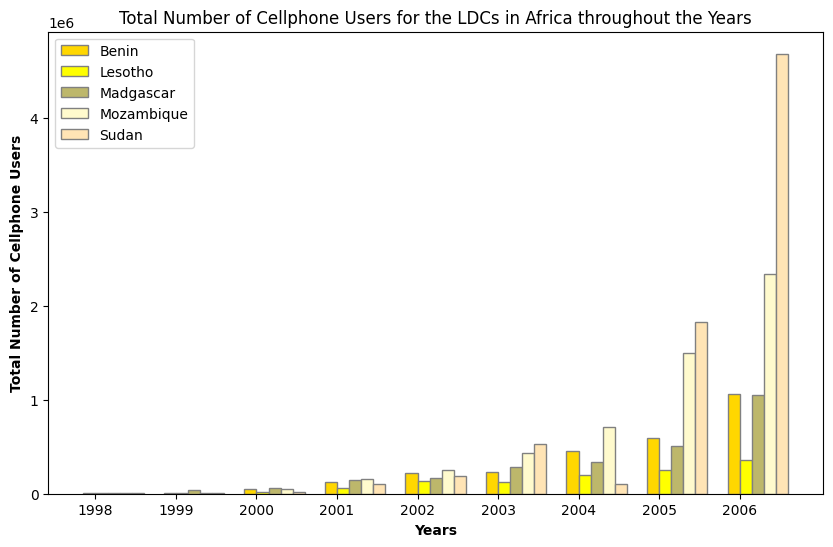

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cellphoneAFR = pd.read_excel("/content/AFRcellphones.xlsx")
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_cellphoneAFR.columns.drop('country'):
  df_cellphoneAFR[column]=df_cellphoneAFR[column].apply(convert_to_numeric)




df_cellphoneAFR.set_index('country', inplace=True)


Years =list(range(1998,2007))
Benin = list(df_cellphoneAFR.iloc[0])
Lesotho = list(df_cellphoneAFR.iloc[1])
Madgascar= list(df_cellphoneAFR.iloc[2])
Mozambique = list(df_cellphoneAFR.iloc[3])
Sudan= list(df_cellphoneAFR.iloc[4])
bar_width = 0.15
r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Benin, color='gold', width=bar_width, edgecolor='grey', label='Benin')
plt.bar(r2, Lesotho, color='yellow', width=bar_width, edgecolor='grey', label='Lesotho')
plt.bar(r3, Madgascar, color='darkkhaki', width=bar_width, edgecolor='grey', label='Madgascar')
plt.bar(r4, Mozambique, color='lemonchiffon', width=bar_width, edgecolor='grey', label='Mozambique')
plt.bar(r5, Sudan, color='moccasin', width=bar_width, edgecolor='grey', label='Sudan')


# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Total Number of Cellphone Users', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Total Number of Cellphone Users for the LDCs in Africa throughout the Years')
plt.legend()


      country   1998   1999   2000  2001  2002  2003   2004   2005   2006
0       Benin   6290   7270  55.5k  125k  219k  236k   459k   596k  1.06M
1     Lesotho   9830    12k  21.6k   57k  138k  126k   196k   250k   358k
2  Madagascar  12.8k  35.8k  63.1k  148k  163k  284k   334k   510k  1.05M
3  Mozambique   6730  12.2k  51.1k  153k  255k  436k   708k   1.5M  2.34M
4       Sudan   8600    13k    23k  104k  191k  527k  1.05M  1.83M  4.68M
0     6290
1     9830
2    12.8k
3     6730
4     8600
Name: 1998, dtype: object
0     6290.0
1     9830.0
2    12800.0
3     6730.0
4     8600.0
Name: 1998, dtype: float64
0     7270
1      12k
2    35.8k
3    12.2k
4      13k
Name: 1999, dtype: object
0     7270.0
1    12000.0
2    35800.0
3    12200.0
4    13000.0
Name: 1999, dtype: float64
0    55.5k
1    21.6k
2    63.1k
3    51.1k
4      23k
Name: 2000, dtype: object
0    55500.0
1    21600.0
2    63100.0
3    51100.0
4    23000.0
Name: 2000, dtype: float64
0    125k
1     57k
2    148k
3    15

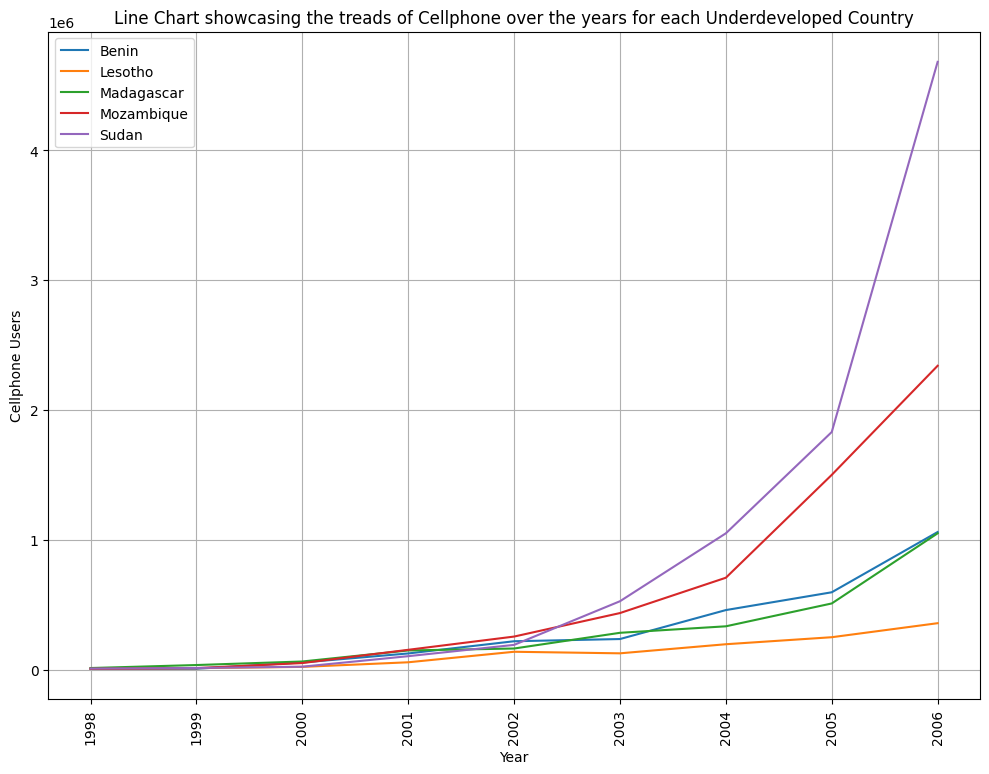

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cellphoneAFR = pd.read_excel("/content/AFRcellphones.xlsx")
print(df_cellphoneAFR)
def convert_to_numeric(value):
  if isinstance(value, str):
    if 'k' in value:
      return float(value.replace('k',''))*1000
    elif 'M' in value:
      return float(value.replace('M',''))*1000000
    else:
      return float(value)
  else:
    return value
for column in df_cellphoneAFR.columns.drop('country'):
  print(df_cellphoneAFR[column])
  df_cellphoneAFR[column]=df_cellphoneAFR[column].apply(convert_to_numeric)
  print(df_cellphoneAFR[column])


print(df_cellphoneAFR)

df_cellphoneAFRIndex = df_cellphoneAFR.set_index('country').T

plt.figure(figsize=(10, 8))
for country in df_cellphoneAFRIndex.columns:
    plt.plot(df_cellphoneAFRIndex.index, df_cellphoneAFRIndex[country], label=country)

plt.xlabel('Year')
plt.ylabel('Cellphone Users')
plt.title('Line Chart showcasing the treads of Cellphone over the years for each Underdeveloped Country')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()